## Problem Statement: With iris dataset we need to cluster iris flowers into certain groups

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv("Iris.csv")

In [11]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [12]:
# drop unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [16]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## EDA

<Axes: xlabel='petal_length', ylabel='petal_width'>

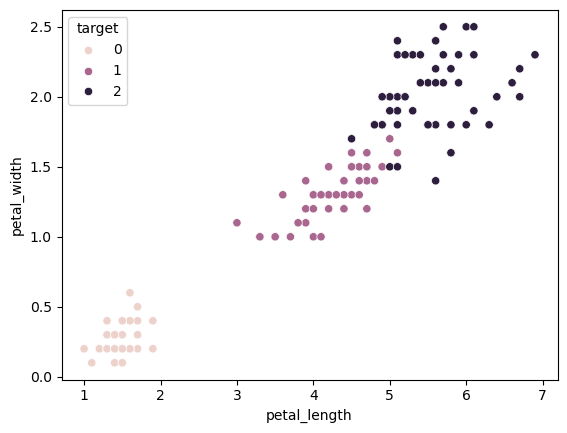

In [17]:
sns.scatterplot(x='petal_length', y='petal_width', hue='target', data=data)

In [18]:
# in k mean algorithm we will cluster the data wihout using target

In [19]:
df=data[['sepal_length', 'sepal_width', 'petal_length','petal_width']]
# Creating dataframe only for numerical features.

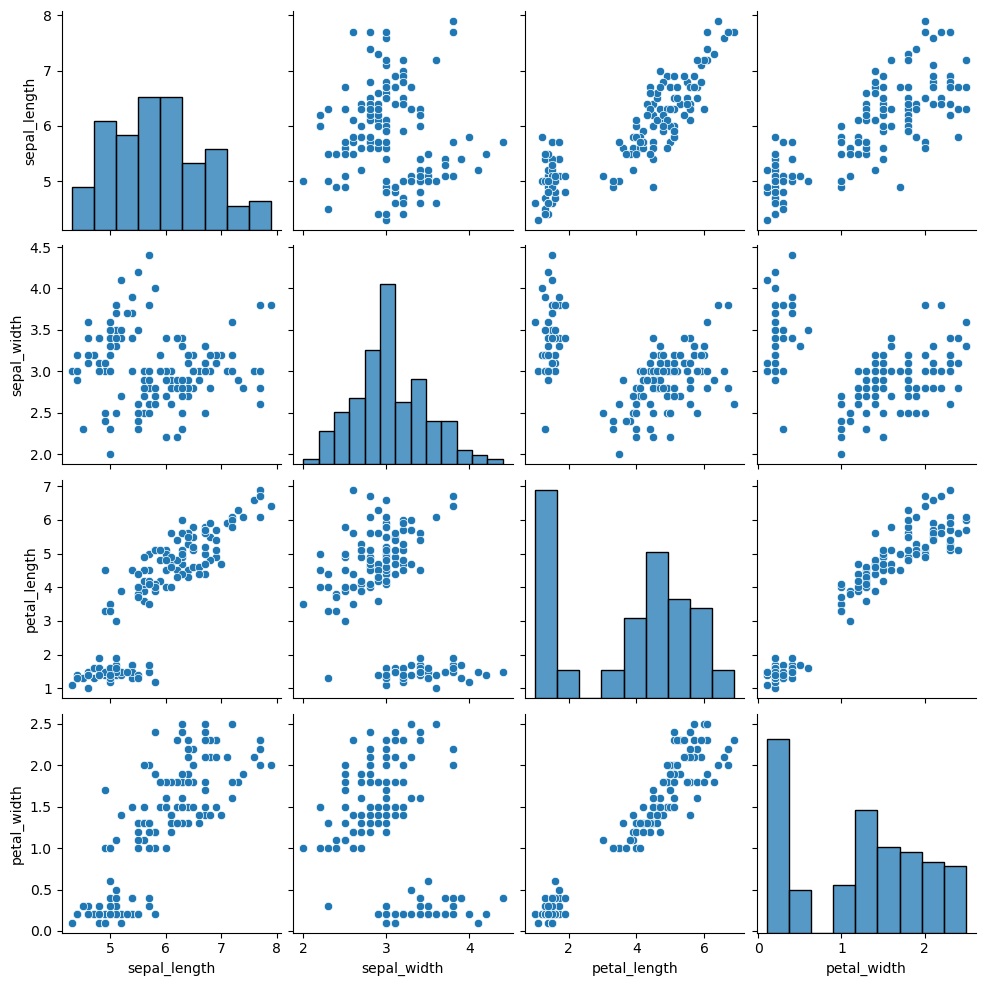

In [20]:
sns.pairplot(df)

### Data Preprocessing

In [21]:
# check missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

* No null value present

## Model Building

In [22]:
# Since it is an unsupervised learning, we need only the input variables
X= data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans
# Initialise the model with K as 3
model = KMeans(n_clusters=3, random_state=10)
#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=10)

In [24]:
X.shape

(150, 4)

In [25]:
# centroids of the cluster
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [26]:
# Set colours to the clusters to differentiate(Not required in main impelemntation)
color_scheme = np.array(['red','blue','green','yellow','pink','cyan'])
color_scheme

array(['red', 'blue', 'green', 'yellow', 'pink', 'cyan'], dtype='<U6')

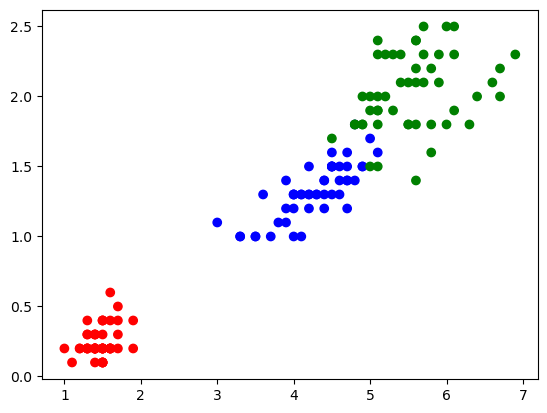

In [27]:
# Visualize the clusters in the original data(Not required in main impelemntation)
plt.scatter(data.petal_length,data.petal_width,color=color_scheme[data.target])

In [41]:
# label created by our model
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

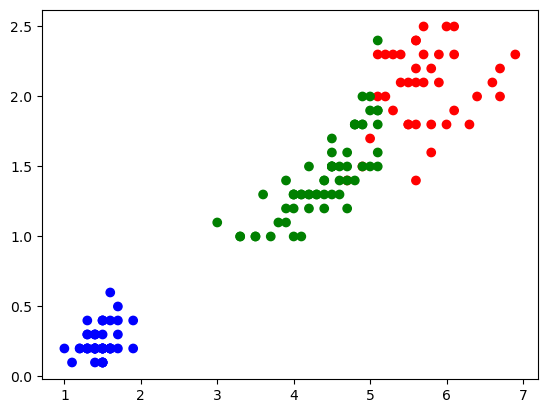

In [40]:
# visualize the clusters formed by the model(Not required in main impelemntation)
plt.scatter(X.petal_length,X.petal_width,color=color_scheme[model.labels_]);

In [39]:
X

,sepal_length,sepal_width,petal_length,petal_width,Group
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [30]:
# print dataset with the label
X['Group']= pd.DataFrame(model.labels_)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,Group
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [31]:
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [32]:
new_point=[[4.3,3.5,1.5,0.4]] # pass new values to the data for prediction based on no. of column
model.predict(new_point)

array([1])

In [33]:
type(new_point)

list

### Determine K using elbow method

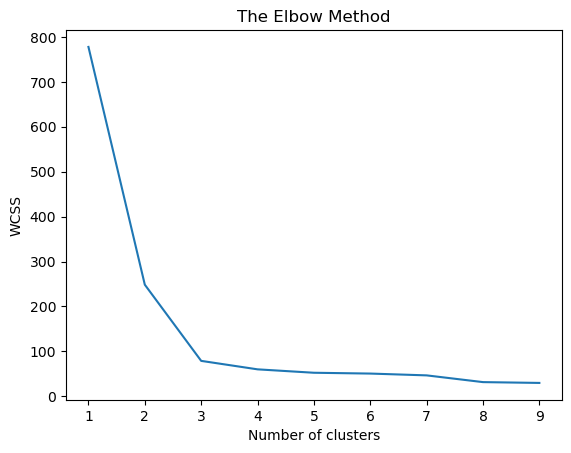

In [49]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10): # trying 10 clusters and then selecting appropriate value
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of square
plt.show()

In [43]:
# here bend of graph are at two points 2 and 3 so consider so consider both values as number of cluster and check silhouette score for each
# then select the point as no. of cluster who has accurate silhouette score

### Evaluation Metrics:

In [35]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.6844657470953514